In [2]:
coords = []
read_lens = []
with open("readlen-distribution.csv", 'r') as r:
    for line in r:
        if not line.startswith("#"):
            columns = line.strip().split(",")
            coords.append((int(columns[0]), int(columns[1])))
            read_lens.extend(int(columns[1])*[int(columns[0])])

In [3]:
coords.sort()
read_lens.sort()

In [4]:
from scipy.stats import skewnorm as sn
import numpy as np

ae, loce, scalee = sn.fit(np.array(read_lens))

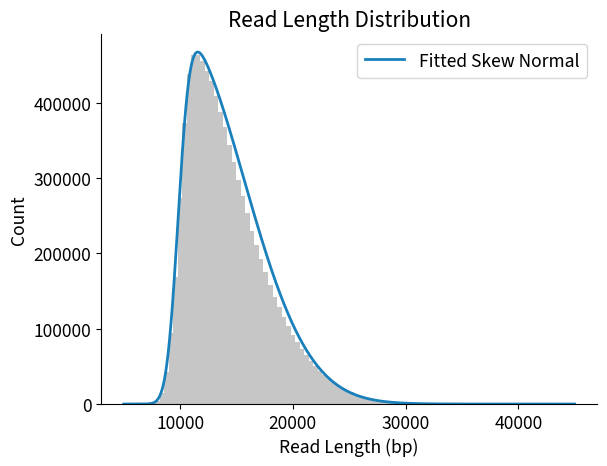

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from pyfonts import load_google_font

font_path = load_google_font("Source Sans 3")

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
plt.rcParams.update({'font.size': 14})
mpl.rcParams['font.family'] = 'Source Sans 3'

# If font_path is a FontProperties object, get the actual path
if hasattr(font_path, 'get_file'):
    mpl.font_manager.fontManager.addfont(font_path.get_file())
else:
    mpl.font_manager.fontManager.addfont(font_path)

lens, weight = zip(*coords)
binwidth = 400
bins = np.arange(5000, 45000, binwidth)
plt.hist(lens, weights=weight, bins=bins, alpha=0.8, color='#b8b8b8')
plt.title("Read Length Distribution")
plt.xlabel("Read Length (bp)")
plt.ylabel("Count")
d = sn.pdf(np.arange(5000, 45000), ae, loce, scalee)
plt.plot(np.arange(5000, 45000),d*3.6e9, label='Fitted Skew Normal', color="#1a80bb" ,linewidth=2)
plt.legend(loc='upper right')
plt.savefig("readlen_distribution.svg")
plt.show()